# Is the Biontech vaccine useful for the coronavirus?

Hypotheses:

H0: μb = μa (There is no difference before and after the BionTech vaccine. )

H1: μb != μa (There is difference before and after the BionTech vaccine. )

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats

Importing Turkey coronavirus number of cases to Python;

In [3]:
df = pd.read_csv("./timeline.csv", sep = ",")
df.tail()

,patients,totalPatients,deaths,totalDeaths,recovered,totalRecovered,totalIntubated,totalIntensiveCare,tests,totalTests,date,critical,pneumoniaPercent,cases
468,565,5381736,57,49293,5214,5242945,NaN,NaN,223238,58997073,22/06/2021,791.0,"%2,9",6143.0
469,550,5387545,65,49358,5917,5248862,NaN,NaN,224192,59221265,23/06/2021,763.0,"%2,9",5809.0
470,498,5393248,59,49417,5846,5254708,NaN,NaN,223385,59444650,24/06/2021,752.0,"%2,9",5703.0
471,477,5398878,56,49473,7184,5261892,NaN,NaN,222936,59667586,25/06/2021,737.0,"%2,9",5630.0
472,470,5404144,51,49524,7402,5269294,NaN,NaN,222561,59890147,26/06/2021,733.0,"%2,9",5266.0


We will analyze the cases column.

In [4]:
df1 = df[["date","cases"]]
df1 = pd.DataFrame(df1)
df1.tail()

,date,cases
468,22/06/2021,6143.0
469,23/06/2021,5809.0
470,24/06/2021,5703.0
471,25/06/2021,5630.0
472,26/06/2021,5266.0


We need the number of case data between 26.04.2021 and 26.06.2021 because a lot of BionTech vaccine came to Turkey at 26.05.2021 and people started vaccinated. So we will analyze 1 month before and 1 month after from vaccine arrives.

In [5]:
df1 = df1.loc[411:472]
df1

,date,cases
411,26/04/2021,37312.0
412,27/04/2021,43301.0
413,28/04/2021,40444.0
414,29/04/2021,37674.0
415,30/04/2021,31891.0
...,...,...
468,22/06/2021,6143.0
469,23/06/2021,5809.0
470,24/06/2021,5703.0
471,25/06/2021,5630.0


We should divide the dataset into two according to the date of 26.05.2021.

In [6]:
df1_before = pd.DataFrame(df1.loc[411:441]["cases"])
df1_before.reset_index(drop = True, inplace = True)
df1_after = pd.DataFrame(df1.loc[441:472]["cases"])
df1_after.reset_index(drop = True, inplace = True)

Data manipulation;

In [7]:
# Dataset 1
sep = pd.concat([df1_before, df1_after], axis = 1)
sep.columns = ["before", "after"]
sep.before[31] = sep.before.mean()
print("Seperate Dataset: \n\n", sep.head(), "\n\n")

# Dataset 2
# Before BionTech vaccine group;
before = np.arange(len(df1_before))
before = pd.DataFrame(before)
before[:] = "Before"
A = pd.concat([df1_before, before], axis = 1)

# After BionTech vaccine group;
after = np.arange(len(df1_after))
after = pd.DataFrame(after)
after[:] = "After"
B = pd.concat([df1_after, after], axis = 1)

# Entire data;
entire_data = pd.concat([A,B])
entire_data

entire_data.columns = ["Case", "Before-After"]
print("Entire Dataset: \n\n", entire_data.head(), "\n\n")

Seperate Dataset: 

     before   after
0  37312.0  8738.0
1  43301.0  8426.0
2  40444.0  7773.0
3  37674.0  7656.0
4  31891.0  6933.0 


Entire Dataset: 

       Case Before-After
0  37312.0       Before
1  43301.0       Before
2  40444.0       Before
3  37674.0       Before
4  31891.0       Before 




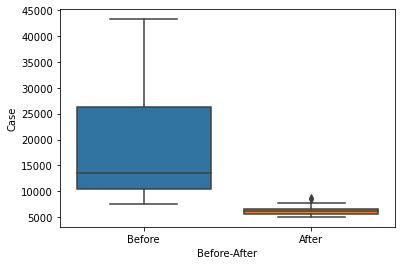

In [8]:
sns.boxplot(x = "Before-After", y = "Case", data = entire_data);

We can see the BionTech vaccine effect on cases on this box plot. But now, let's question the reality of the information we get from this graph with the Two Sample T Test.

First, we need to control the normality assumption.

In [9]:
shapiro(sep.before)

ShapiroResult(statistic=0.8636682033538818, pvalue=0.000832327757962048)

Since the p-value < 0.05, the H0 hypothesis can be rejected. 

In [10]:
shapiro(sep.after)

ShapiroResult(statistic=0.9170056581497192, pvalue=0.017258433625102043)

Since the p-value < 0.05, the H0 hypothesis can be rejected. 

Assumption of normality is provided for both groups.

Now, we need to control homogeneity of variance assumption.

In [11]:
stats.levene(sep.before, sep.after)

LeveneResult(statistic=29.615598438083506, pvalue=9.529735710651949e-07)

H0 hypothesis is rejected because p-value < 0.05. Therefore, the assumption of homogeneity of variance is not provided. The lack of homogeneity of variance in the dependent two-sample T-test can be ignored.

Now, the last step, let's do the hypothesis test.

In [12]:
result = stats.ttest_rel(sep.before, sep.after)
result

Ttest_relResult(statistic=7.14542371462148, pvalue=4.959317636709579e-08)

In [13]:
if result.pvalue < 0.05:
    print("BionTech vaccine is useful for coronavirus.")
else:
    print("BionTech vaccine is not useful for coronavirus.")

BionTech vaccine is useful for coronavirus.


H0 hypothesis is rejected because p-value < 0.05. In other words, there is a difference after BionTech vaccination. Vaccination has positively affected the cases.